# Exploratory Data Analysis Made (a bit) Easier

_Xplore_ is a python package that aims to make Exploratory Data Analysis (EDA) a bit easier. EDA, in case you are asking, is the process of investigating a dataset in order to develop an intiution that will help during subsequent steps.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from main import Xplorer, read_pipeline, eval_models, plot_models

%matplotlib inline

In this tutorial, we will use California Housing Dataset. If you wish to interact with this tutorial and use the dataset, uncommont the following block to download the dataset into a new folder called "data".

In [2]:
# import os
# import tarfile
# from six.moves import urllib

# DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
# HOUSING_PATH = "data"
# HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#     if not os.path.isdir(housing_path):
#         os.makedirs(housing_path)
#     tgz_path = os.path.join(housing_path, "housing.tgz")
#     urllib.request.urlretrieve(housing_url, tgz_path)
#     housing_tgz = tarfile.open(tgz_path)
#     housing_tgz.extractall(path=housing_path)
#     housing_tgz.close()

# def load_housing_data(housing_path=HOUSING_PATH):
#     csv_path = os.path.join(housing_path, "housing.csv")
#     return pd.read_csv(csv_path)

# fetch_housing_data()

## First Steps

First, we define an "Xplorer" instance with the path to the dataset and the name of the response variable. This object will host the dataset, a simple logging of all steps and all the required method to transform and manipulate the dataset.

In [3]:
calif = Xplorer(df='data/housing.csv', y='median_house_value')

.. for example, we usually want to make sure that we encoded the data with corrent types. If you check _calif.df.dtypes_ you can see if columns are correctly encoded. If not, we should first fix column types into any type recognizable by Pandas library.

In [4]:
calif.fix_types(col_types={'ocean_proximity': 'category'})

Let's use print_stats() to see what we are dealing with

In [5]:
calif.print_stats()

 
Diagnostic Report:
 
-- Type Table --
          Count
Type           
float64       9
category      1
 
Number of observations:	 20640
Number of features:	 10
Observations with at least 1 missing value(s): 207 (0.01002906976744186%)
Features with at least 1 missing value(s): 1 (0.1%)
 
-- Missing Cells Table --
                    na_count  na_percentage
longitude                  0       0.000000
latitude                   0       0.000000
housing_median_age         0       0.000000
total_rooms                0       0.000000
total_bedrooms           207       0.010029
population                 0       0.000000
households                 0       0.000000
median_income              0       0.000000
median_house_value         0       0.000000
ocean_proximity            0       0.000000
 
Total missing cells: 207 (0.001002906976744186%) 
 
-- Detailed Stats --
 
 
===== Column: 'longitude' =====
count    20640.000000
mean      -119.569704
std          2.003532
min       -124.350000
25

As we have many missing values (in 'total_bedrooms') we can use impute_nans() to replace thoes missin values with numbers. The default behavior will use the median of the column.

In [6]:
calif.impute_nans()

## Now to the pretty stuff..

There are two ways to see a dataset:
- Plot the variation within a column (1D), or
- Plot the covariation between two columns (2d)

Those two approaches, variation exploration and covariation exploration can be both accessed in explore_feature_variaiton(col) and explore_feature_covariation(col1, col2).

In the following parts, we are going into an iterative process between exploration and transforming features so that they meet our expectations.

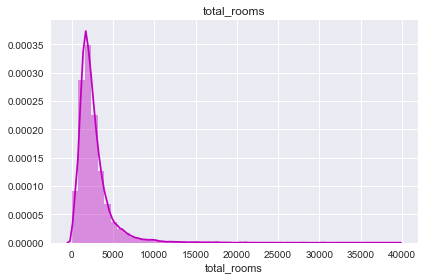

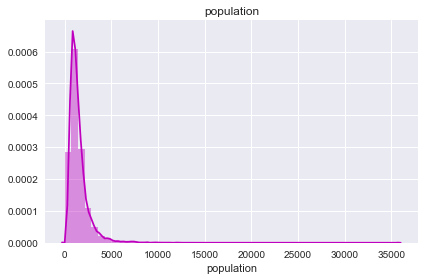

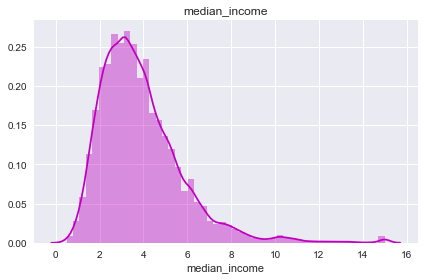

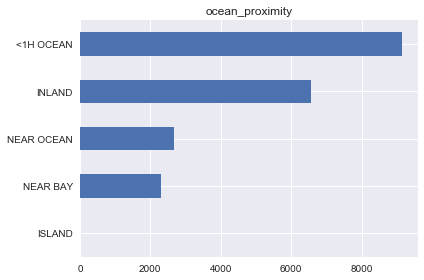

In [7]:
calif.explore_feature_variation(col=['total_rooms','population','median_income','ocean_proximity'])

So explore_feature_variation(col) takes an optional argument of either a column name or a list of columns names and then loops through them to visualize their distribution. Here we are deeply interested in variation __within__ features. There are many questions we can answer just by looking at those figures:
- What is the most common value and what is the least common value ?
- Does the distribution of values seem normal ? Is there anything "off" like an erratic bump in some extreme side ?
- Is there a long-tail ? 
- etc etc

Most of the time, however, we want to know how those features vary within _and_ covary with the target variable. To do this, we will set '_use__target_' argument which allows us to see a scatter plot of all columns with the target variable along with their distributions on the margins.

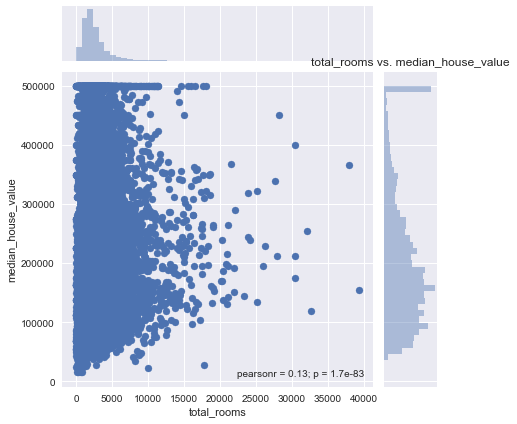

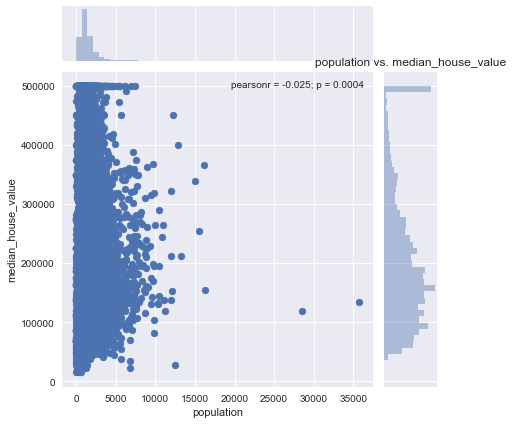

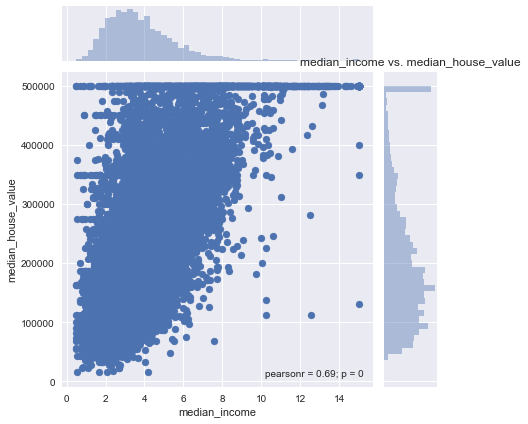

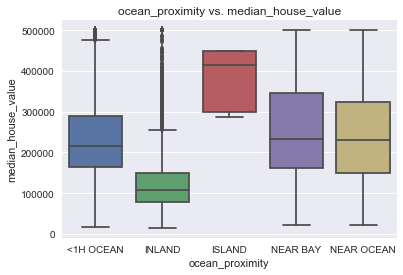

In [8]:
calif.explore_feature_variation(col=['total_rooms','population','median_income',
                                     'ocean_proximity'], use_target=True)

Something is not cool with those values. They all seem "long-tailed", meaning that there are many large values that skew the distribution. Let's take 'median_income' again as an example:

- First Notice if values are reasonable.

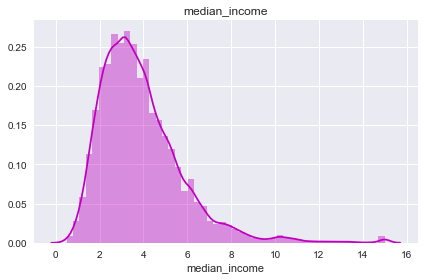

In [9]:
calif.explore_feature_variation(col='median_income')

One way to combat this long-tail is to use log-transform. Basically, just taking the log of all the values, so the bigger numbers are now squashed while smaller numbers remain less affectd. We use transform_feature() on the given column and write our own function (using lambda expressions).

In [10]:
calif.transform_feature(col='median_income', func_str='lambda x: np.log1p(x)', new_col_name='median_income_log')

The new values are not stored in a new column (named 'median_income_log'). using explore_feature_variation(), we can see that we did make it look almost like a normal distribution!

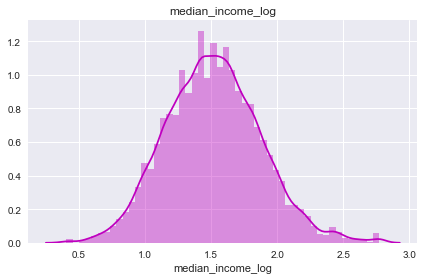

In [11]:
calif.explore_feature_variation(col='median_income_log')

Amazing but.. there still a little bump in the far right. I, visually, take this as a potential outlier. You are not forced to deal with outlieres in ever case and scenario as some algorithms are not affected by their presence. But it is often a good idea to clean them. 

We use replace_outliers() and impute_nans() respectively to replace outliers in any given column with the median of that column.

In [12]:
calif.replace_outlier(col='median_income_log')
calif.impute_nans(col='median_income_log')

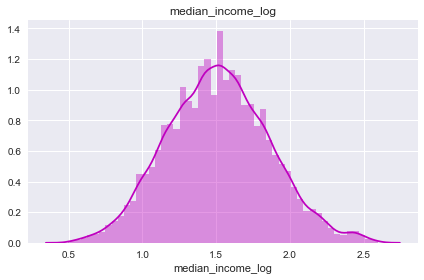

In [13]:
calif.explore_feature_variation(col='median_income_log')

We can apply the same logic of detecting and imputing outliers on other columns, like 'population'. Just notice how big is the differece between the two distributions!

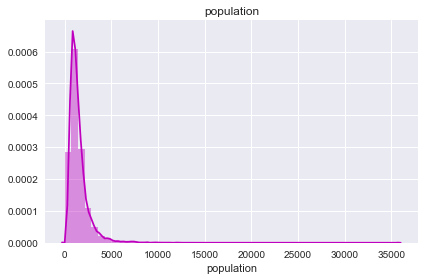

In [14]:
calif.explore_feature_variation(col='population')

In [15]:
calif.replace_outlier(col='population')
calif.impute_nans(col='population')

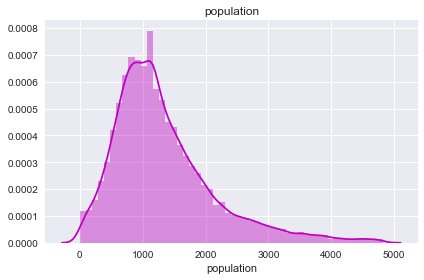

In [16]:
calif.explore_feature_variation(col='population')

Once again, I will use the log-transform once again just to see how it would look like..

In [17]:
calif.transform_feature(col='population', func_str='lambda x: np.log(x)', new_col_name='population_log')

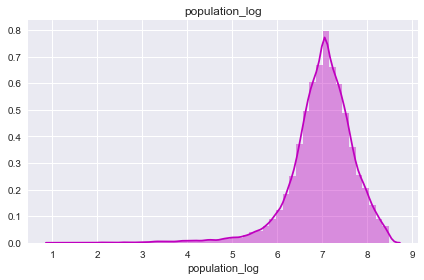

In [18]:
calif.explore_feature_variation(col='population_log')

Well, we still have a tiny long-tail, but that hopefully is not a big issue in practice. We can actually undo what we did and just remove the new feature.

In [19]:
calif.remove_feature(col='population_log')

While some Machine Learning algorithms can toletate different scales, others can not and assume that you take care of scaling your features appropriately before pushing them to the the Robot that will soon take your job. 

We can easily apply many scaling routines on any set of columns using scale_feature(). All details about different scalers and when they are appropriate can be found in [scikit-learn's awesome guide](http://scikit-learn.org/dev/auto_examples/preprocessing/plot_scaling_importance.html).

Oh.. you can actually pass scikit-learn scalars names if you like to use them! e.g.:

In [20]:
calif.scale_feature(col='population', scaling='maxabs_scale')

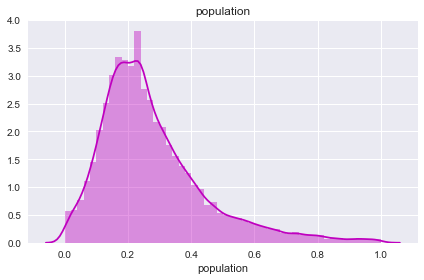

In [21]:
calif.explore_feature_variation(col='population')

Let's go 2D. As you can see, explore_feature_covariation(col1,col2) deals with visualizing the relationship between two different columns.

Here, we will see how 'population' relates to 'median_income'.

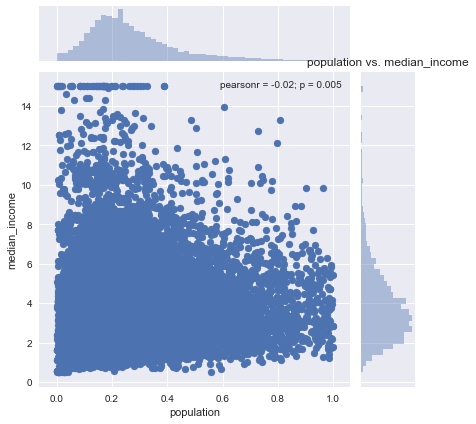

In [22]:
calif.explore_features_covariation(col1='population',col2='median_income')

Since both explore_feature_variation() and explore_features_covariation() use Seaborn's functionalities, you can actually pass on other keyword arguments as long as they are appropriate things to say..

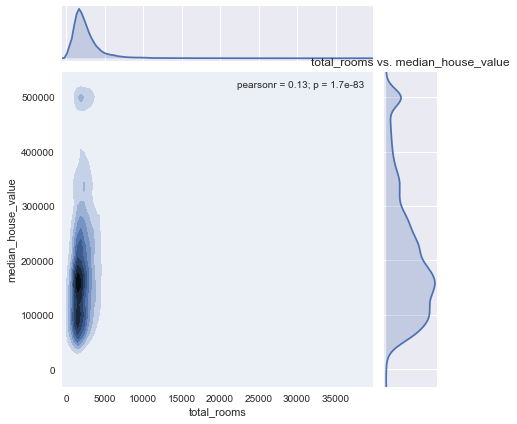

In [23]:
calif.explore_feature_variation(col='total_rooms', use_target=True, kind='kde')

And we just remembered that we have a categorical feature. Most methods only apply to numeric features, but here are two methods that can handle categorical columns:

- impute_nans() -- replaces any NaNs in a categorical column with the most frequent category.
- encode_categorical_features() -- converts categorical features into a binary representation that is suitable for ML algorithms (also known as [one-hot encoding](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science)).

To explain the second method, imagine we have a categorical column 'paid' that only contain those values: YES and NO. This function breaks this column into two columns, paid_YES and paid_NO where all values in those two columns are either 1 or 0, depending on the category of the observation.

Since we have a categorical column, we almost certainly want to convert it to a binary representation.

In [24]:
calif.encode_categorical_feature(col='ocean_proximity')

So where are we? We have performed different operations at different columns but we didn't really started with a solid plan because, surprise surprise, we are still exploring this dataset. No worries, all your transformations and data manipulations are recorded...

In [25]:
calif.log

["self.read_data(df='data/housing.csv')",
 "self.set_target(y='median_house_value')",
 "self.fix_types(col_types={'ocean_proximity': 'category'})",
 "self.impute_nans(col=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity'],method='median')",
 "self.transform_feature(col=['median_income'],func_str='lambda x: np.log1p(x)',new_col_name='median_income_log',addtional_params=None)",
 "self.replace_outlier(col=['median_income_log'],value=np.nan)",
 "self.impute_nans(col=['median_income_log'],method='median')",
 "self.replace_outlier(col=['population'],value=np.nan)",
 "self.impute_nans(col=['population'],method='median')",
 "self.transform_feature(col=['population'],func_str='lambda x: np.log(x)',new_col_name='population_log',addtional_params=None)",
 "self.remove_feature(col=['population_log'])",
 "self.transform_feature(col=['population'],func_str='maxabs_scale',new_col_name=No

You can 'freeze and save' this little processing pipeline into desk...

In [26]:
calif.freeze_and_save_pipeline('calif_housing.dat')

.. you come back later and load the pipeline using read_pipeline to restore the log and execute it to have your data back as you wanted.

In [27]:
calif_alias = read_pipeline('calif_housing.dat')

Cannot log read_data properly.


In [28]:
assert (calif_alias.df == calif.df).all().all(), 'Not equal!'

One last thing (for those who love Pandas), the dataset itself is stored in 'df' variable inside the class (e.g., _calif.df_), and you can play with it directly whenever you need. Just be aware that those are not going to be recorded.